In [2]:
# Lab - EDA Univariate Analysis: Diving into Amazon UK Product Insights

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


%matplotlib inline

In [7]:
# Loading Amazon UK product dataset
df = pd.read_csv("/Users/adimalik/Documents/Iron Hack/Labs/Week5/1. lab-eda-univariate/amz_uk_price_prediction_dataset.csv")

In [8]:
# Display the first few rows of the dataset
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [ ]:
# Part 1: Understanding Product Categories

In [ ]:
# **Business Question**: What are the most popular product categories on Amazon UK, and how do they compare in terms of listing frequency?

In [23]:
category_counts = df['category'].value_counts()

In [24]:
category_counts_sorted = category_counts.sort_values(ascending=False)

In [25]:
print("Most popular product categories on Amazon UK and their listing frequencies:")
print(category_counts_sorted)

Most popular product categories on Amazon UK and their listing frequencies:
category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
                                           ...  
Alexa Built-In Devices                       107
Motorbike Chassis                            107
Plugs                                        107
Smart Home Security & Lighting               104
Smart Speakers                                54
Name: count, Length: 296, dtype: int64


In [26]:
## 1. **Frequency Tables**:

# - Generate a frequency table for the product `category`.

category_frequency_table = df['category'].value_counts()

print("Frequency table for product categories:")
print(category_frequency_table)

Frequency table for product categories:
category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
                                           ...  
Alexa Built-In Devices                       107
Motorbike Chassis                            107
Plugs                                        107
Smart Home Security & Lighting               104
Smart Speakers                                54
Name: count, Length: 296, dtype: int64


In [27]:
# - Which are the top 5 most listed product categories?

top_5_categories = category_frequency_table.head(5)

print("\nTop 5 most listed product categories:")
print(top_5_categories)


Top 5 most listed product categories:
category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: count, dtype: int64


In [30]:
# 2. **Visualizations**:

# - Display the distribution of products across different categories using a bar chart. *If you face problems understanding the chart, do it for a subset of top categories.*

frequency = df['category'].value_counts()

In [31]:
frequency

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
                                           ...  
Alexa Built-In Devices                       107
Motorbike Chassis                            107
Plugs                                        107
Smart Home Security & Lighting               104
Smart Speakers                                54
Name: count, Length: 296, dtype: int64

In [32]:
category = df['category']

In [33]:
category

0              Hi-Fi Speakers
1              Hi-Fi Speakers
2              Hi-Fi Speakers
3              Hi-Fi Speakers
4              Hi-Fi Speakers
                  ...        
2443646    Motorbike Clothing
2443647    Motorbike Clothing
2443648    Motorbike Clothing
2443649    Motorbike Clothing
2443650    Motorbike Clothing
Name: category, Length: 2443651, dtype: object

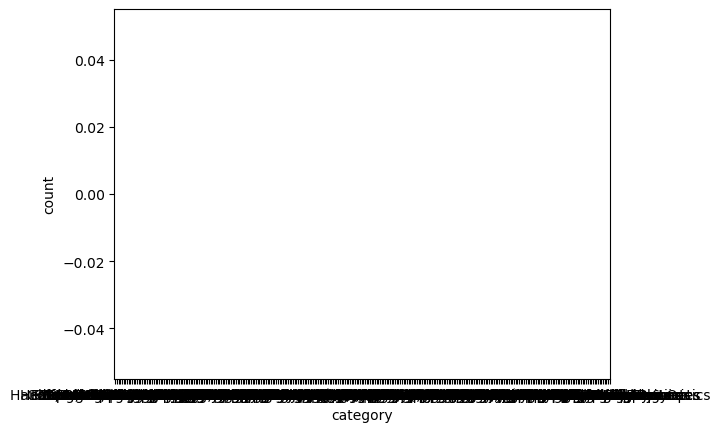

In [37]:
sns.barplot(x=category, y=frequency, palette="Set3");

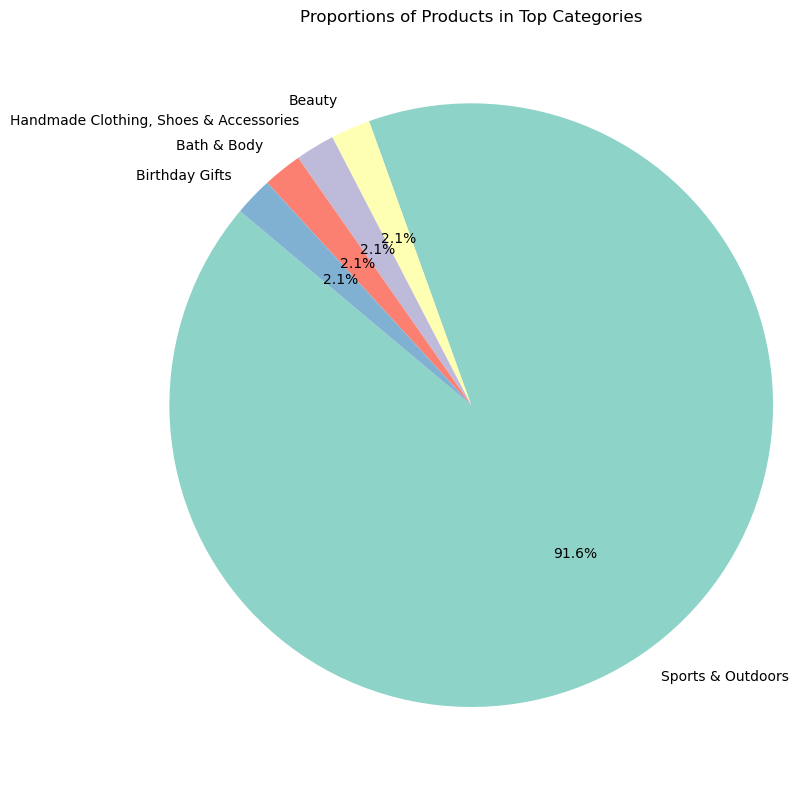

In [44]:
# - For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?

plt.figure(figsize=(8, 8))
sns.set_palette("Set3")
plt.title('Proportions of Products in Top Categories')
plt.axis('equal')
plt.pie(top_5_categories, labels=top_5_categories.index, autopct='%1.1f%%', startangle=140)
plt.tight_layout()
plt.show()

In [45]:
## Part 2: Delving into Product Pricing

In [ ]:
# **Business Question**: How are products priced on Amazon UK, and are there specific price points or ranges that are more common?

In [61]:
# 1. **Measures of Centrality**:
# - Calculate the mean, median, and mode for the `price` of products.

mean_price = df['price'].mean()
median_price = df['price'].median()
mode_price = df['price'].mode()

mean_price, median_price, mode_price

(89.24380943923663,
 19.09,
 0    9.99
 Name: price, dtype: float64)

In [51]:
# What's the average price point of products listed? How does this compare with the most common price point (mode)?

most_common_price = df['price'].mode()[0]
print(most_common_price)

9.99


In [52]:
# 2. **Measures of Dispersion**:
# - Determine the variance, standard deviation, range, and interquartile range for product `price`.

variance_price = df['price'].var()
std_dev_price = df['price'].std()
min_price = df['price'].min()
max_price = df['price'].max()
range_price = max_price - min_price
quantiles_price = df['price'].quantile([0.25, 0.5, 0.75])

variance_price, std_dev_price, min_price, max_price, range_price, quantiles_price

(119445.48532256528,
 345.60886175352226,
 0.0,
 100000.0,
 100000.0,
 0.25     9.99
 0.50    19.09
 0.75    45.99
 Name: price, dtype: float64)

In [72]:
# - How varied are the product prices? Are there any indicators of a significant spread in prices?

# The above measures indicate that there is a significant spread in prices. The high variance and standard deviation suggest that the prices are widely spread out from the mean, indicating a considerable level of variability in pricing. The range, which is from 0 to 100,000, also highlights the extent of this variability. Additionally, the interquartile range suggests that even within the middle 50% of prices, there's a substantial difference between the 25th and 75th percentiles, indicating variability in the central tendency of prices as well. Overall, these indicators suggest that product prices are quite varied.

<Axes: xlabel='price', ylabel='Count'>

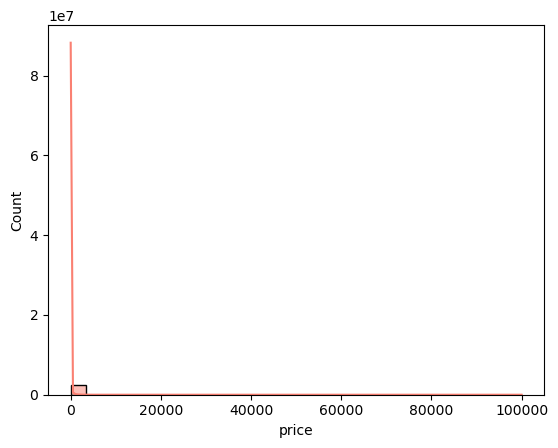

In [54]:
# 3. **Visualizations**:
#  - Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. *If its hard to read these diagrams, think why this is, and explain how it could be solved.*.

sns.histplot(df['price'], kde=True, bins=30, color="salmon")

<Axes: >

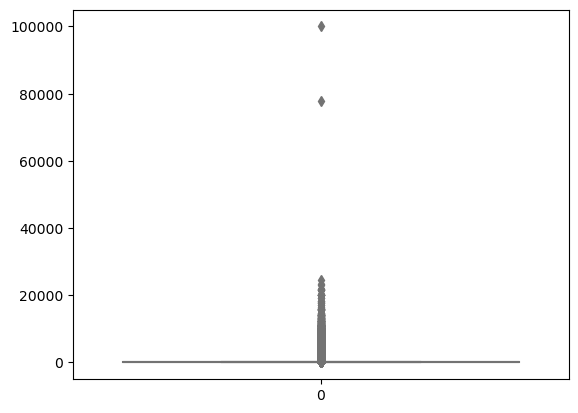

In [55]:
# - Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread and potential outliers in product pricing. 

sns.boxplot(data = df['price'], color="lightgreen")

In [56]:
# Discretizing 'price' into 4 categories
bins = [0, 10000, 20000, 30000, df['price'].max()]
labels = ['Low', 'Medium', 'High', 'Very High']
df['price_category'] = pd.cut(df['price'], bins=bins, labels=labels, include_lowest=True)

In [58]:
df.price_category.value_counts()

price_category
Low          2443484
Medium           154
High              11
Very High          2
Name: count, dtype: int64

In [59]:
## Part 3: Unpacking Product Ratings

In [60]:
# **Business Question**: How do customers rate products on Amazon UK, and are there any patterns or tendencies in the ratings?

In [68]:
# 1. **Measures of Centrality**:
# - Calculate the mean, median, and mode for the `rating` of products.

mean_rating = df['stars'].mean()
median_rating = df['stars'].median()
mode_rating = df['stars'].mode()

mean_rating, median_rating, mode_rating

(2.152836472966065,
 0.0,
 0    0.0
 Name: stars, dtype: float64)

In [66]:
# - How do customers generally rate products? Is there a common trend?

mode_rating = df['stars'].mode()[0]
mode_rating

0.0

In [69]:
# 2. **Measures of Dispersion**:
# - Determine the variance, standard deviation, and interquartile range for product `rating`.

variance_rating = df['stars'].var()
std_dev_rating = df['stars'].std()
min_rating = df['stars'].min()
max_rating = df['stars'].max()
range_rating = max_rating - min_rating
quantiles_rating = df['stars'].quantile([0.25, 0.5, 0.75])

variance_rating, std_dev_rating, min_rating, max_rating, range_rating, quantiles_rating

(4.81743402976196,
 2.1948653785054697,
 0.0,
 5.0,
 5.0,
 0.25    0.0
 0.50    0.0
 0.75    4.4
 Name: stars, dtype: float64)

In [71]:
# - Are the ratings consistent, or is there a wide variation in customer feedback?

# The above measures indicate that there is a wide variation in customer feedback for the products. The high variance and standard deviation suggest that the ratings are spread out from the mean, indicating a considerable level of variability in customer opinions. Additionally, the range, which spans from 0 to 5, also highlights the extent of this variability.
# Moreover, the interquartile range suggests that even within the middle 50% of ratings, there's a substantial difference between the 25th and 75th percentiles, indicating variability in the central tendency of ratings as well.
# Overall, these indicators suggest that the ratings are not consistent, and there is a wide variation in customer feedback. This could imply that different customers have varying experiences or perceptions of the products, leading to a diverse range of ratings.

In [73]:
# 3. **Shape of the Distribution**:
# - Calculate the skewness and kurtosis for the `rating` column. 

skewness_price = df['stars'].skew()
kurtosis_price = df['stars'].kurtosis()

skewness_price, kurtosis_price

(0.08120735761080985, -1.9260061280432985)

In [75]:
# - Are the ratings normally distributed, or do they lean towards higher or lower values?

# Based on these values, the distribution of ratings does not seem to be normally distributed. It has a slight skewness to the right and lighter tails than a normal distribution. This suggests that ratings might lean slightly towards higher values but with less extreme values than a normal distribution would have.

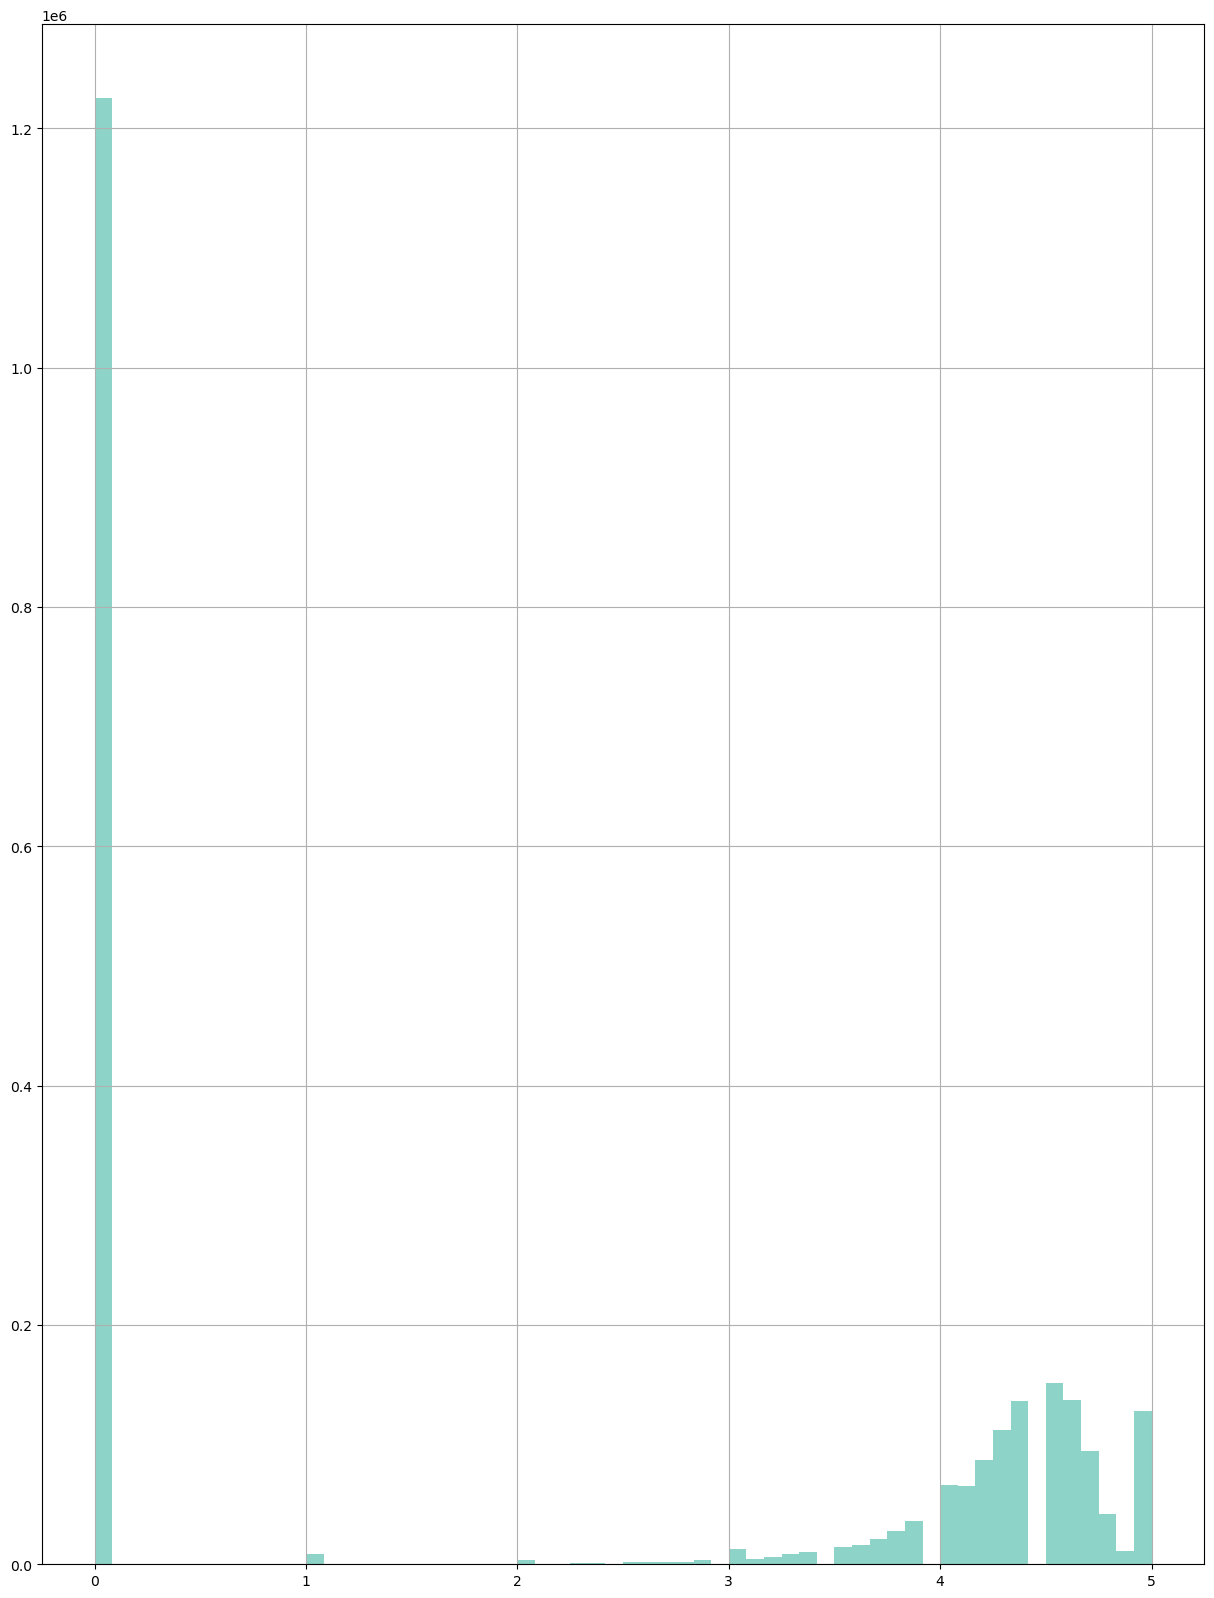

In [76]:
# 4. **Visualizations**:
# - Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common?

df.stars.hist(figsize=(15, 20), bins=60, xlabelsize=10, ylabelsize=10);